In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
from tensorflow.keras.datasets import cifar10

In [21]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

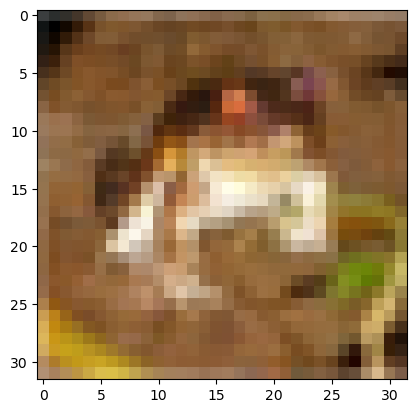

In [22]:
plt.imshow(x_train[0])

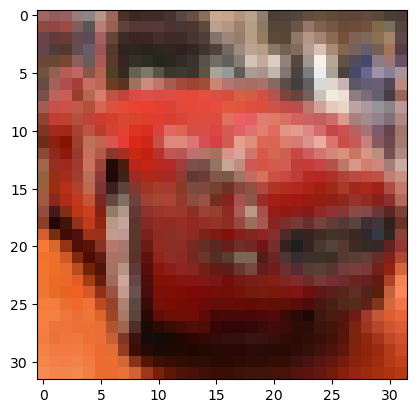

In [23]:
plt.imshow(x_train[5])

In [24]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [25]:
x_train=x_train/255
x_test=x_test/255

In [26]:
y_train_en = to_categorical(y_train, 10)

In [27]:
y_test_en = to_categorical(y_test, 10)

In [31]:
model = Sequential()
model.add(Conv2D(32,(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [33]:
history = model.fit(x_train, y_train_en, epochs=20, verbose=1, validation_data=(x_test, y_test_en) )

Epoch 1/20
1563/1563 [==============================] - 30s 18ms/step - loss: 1.5385 - accuracy: 0.4414 - val_loss: 1.3125 - val_accuracy: 0.5316
Epoch 2/20
1563/1563 [==============================] - 29s 18ms/step - loss: 1.2338 - accuracy: 0.5629 - val_loss: 1.1558 - val_accuracy: 0.5886
Epoch 3/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0974 - accuracy: 0.6151 - val_loss: 1.0858 - val_accuracy: 0.6211
Epoch 4/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0132 - accuracy: 0.6465 - val_loss: 1.0295 - val_accuracy: 0.6383
Epoch 5/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9425 - accuracy: 0.6718 - val_loss: 1.0302 - val_accuracy: 0.6406
Epoch 6/20
1563/1563 [==============================] - 27s 18ms/step - loss: 0.8830 - accuracy: 0.6922 - val_loss: 0.9744 - val_accuracy: 0.6656
Epoch 7/20
1563/1563 [==============================] - 27s 18ms/step - loss: 0.8315 - accuracy: 0.7092 - val_loss: 1.0133 -